# Sentiment Analysis

In this notebook I have implemented Sentiment Analysis for the IMDB movie reviews dataset. 

In [1]:
import pandas as pd
import numpy as np
from nltk.tokenize.toktok import ToktokTokenizer
from bs4 import BeautifulSoup
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
import re

# Dataset
The Dataset can be downloaded from:
http://ai.stanford.edu/~amaas/data/sentiment/ 

### Columns: 

1. Review : Review given by the user 
2. Sentiment : Positive (1) or Negative (0) sentiment of the review.

In [2]:
df = pd.read_csv('movie_dataset_shuffled.csv')
df.head(5)

,review,sentiment
0,That is the only question I am left with. Why ...,0
1,"""Stairway to Heaven"" is a outstanding inventio...",1
2,Every kid has that movie that he pops into VHS...,1
3,Screwball comedy about romantic mismatches in ...,1
4,Hellraiser: Bloodline is only a so-so film. I ...,0


In [3]:
df.describe(include='O')

,review
count,50000
unique,49582
top,Loved today's show!!! It was a variety and not...
freq,5


In [4]:
df.sentiment.value_counts(normalize=True) 

0    0.5
1    0.5
Name: sentiment, dtype: float64

**The data set is Balanced Dataset**

# Cleaning text dataset

### HTML Parsing and removing non-word characters

We will clean the text dataset using BeautifulSoup html parser. BeautifulSoup html parser helps us to get only text portion from the html data. We will use  re.sub [\W]+ to remove all non-word characters.

In [5]:
#Let us define the preprocessing function

def preprocessor(text):

    soup = BeautifulSoup(text, "html.parser")  #Parse html text data
    text =  soup.get_text()                    #Get only the text data
    text = (re.sub('[\W]+', ' ', text)) #Remove all the non-word characters with [\W]+ and convert all 
                                                # the data in lowercase.
    return text

In [6]:
df['review'] = df['review'].apply(preprocessor)

In [7]:
df.head(5)

,review,sentiment
0,That is the only question I am left with Why d...,0
1,Stairway to Heaven is a outstanding invention...,1
2,Every kid has that movie that he pops into VHS...,1
3,Screwball comedy about romantic mismatches in ...,1
4,Hellraiser Bloodline is only a so so film I be...,0


## Stemming  

We will utilize word stemming tool from PorterStemmer() to transform word to it's root form.

In [8]:
#Let us define the function tokenizer_stemming

porter = PorterStemmer()
def stemming(text):
    return " ".join([porter.stem(word) for word in text.split()])


In [9]:
df['review'] = df['review'].apply(stemming)

## StopWords

Stop words are a set of commonly used words in a language. i.e. “a”, “the”, “is”, “are” and etc.  We eliminate stop words as they carry very little information in NLP or Text processing.

In [10]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/bishalbhattarai/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
from nltk.corpus import stopwords

stop = stopwords.words('english')
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [12]:
#Let us define a function to remove stopwords 

def remove_stop(text):
    text = text.lower()
    
    filtered_words = [x for x in text.split() if x not in stop]
    
    return " ".join(filtered_words)
      

In [13]:
df['review'] = df['review'].apply(remove_stop)

In [14]:
df.head()

,review,sentiment
0,onli question left whi thi movi suck much grea...,0
1,stairway heaven outstand invent movi make prob...,1
2,everi kid ha movi pop vh ha noth babysitt arou...,1
3,screwbal comedi romant mismatch new york citi ...,1
4,hellrais bloodlin onli film believ fourth inst...,0


## Train-Test Split

In [15]:
#Train (80%)
X_train = df.loc[:40000, 'review'].values         
y_train = df.loc[:40000, 'sentiment'].values

#Test (20%)
X_test = df.loc[40000:, 'review'].values
y_test = df.loc[40000:, 'sentiment'].values

## Term Frequency-Inverse Document Frequency (TF-IDF)

We will utilize (TF-IDF) instead of bag of words.

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

TF_IDF = TfidfVectorizer(use_idf=True, ngram_range=(1,2), norm='l2',smooth_idf =True)

X_train_transformed_tfidf = TF_IDF.fit_transform(X_train)
X_test_transformed_tfidf = TF_IDF.transform(X_test)


In [17]:
print(X_train_transformed_tfidf.shape, X_test_transformed_tfidf.shape)

(40001, 2241032) (10000, 2241032)


# Classification 

**Logistic Regression**

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

r = 1001
models= [LogisticRegression(random_state=r)]

names = ["LR"]

In [19]:
# logistic regression
lr_params= {"C":np.logspace(-3, 1, 5),
                    "penalty": ["l2"], "solver":['lbfgs','linlinear'], "max_iter":[10000]}


classifier_params = [lr_params]

In [20]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

from sklearn.model_selection import RandomizedSearchCV

cv_result = {}
best_estimators = {}


for name, model,classifier_param in zip(names, models,classifier_params):
        clf =RandomizedSearchCV(estimator = model, param_distributions = classifier_param, n_iter = 100, cv = 10, 
                                verbose=2, random_state=10, n_jobs = 5)
        clf.fit(X_train_transformed_tfidf,y_train)
        cv_result[name]=round(clf.best_score_,2)
        best_estimators[name]=clf.best_estimator_
        print(name,'cross validation accuracy : %.3f'%cv_result[name])

Fitting 10 folds for each of 10 candidates, totalling 100 fits
LR cross validation accuracy : 0.910


In [21]:
best_estimators

{'LR': LogisticRegression(C=10.0, max_iter=10000, random_state=1001)}

# Results

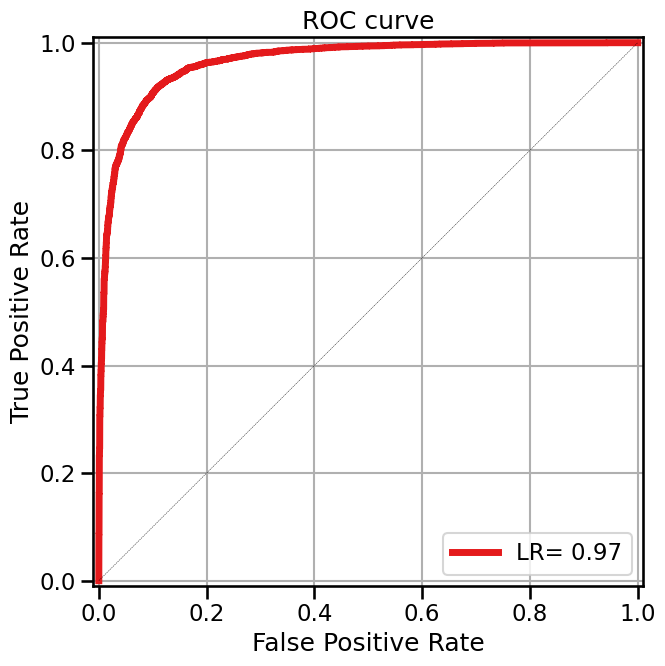

In [22]:
from sklearn.metrics import roc_curve, precision_recall_curve, confusion_matrix, auc
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context('talk')

fig, ax = plt.subplots(ncols=1)
fig.set_size_inches(7, 7)

colors =['#e41a1c','#377eb8','#4daf4a','#984ea3']

i=0
for x in names:
    model = best_estimators[x]

    # Get the probabilities for each of the two categories
    y_prob = model.predict_proba(X_test_transformed_tfidf)

    fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])

    roc_auc = round(auc(fpr, tpr),2)
    label_val = x + '= '+ str(roc_auc)
    ax.plot(fpr, tpr, color=colors[i], linewidth=5, label= label_val)
    i+=1
    
ax.plot([0, 1], [0, 1], ls='--', color='black', lw=.3)
ax.set(xlabel='False Positive Rate',
       ylabel='True Positive Rate',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='ROC curve')
ax.grid(True)
ax.legend(loc=4)


plt.tight_layout()
plt.show()

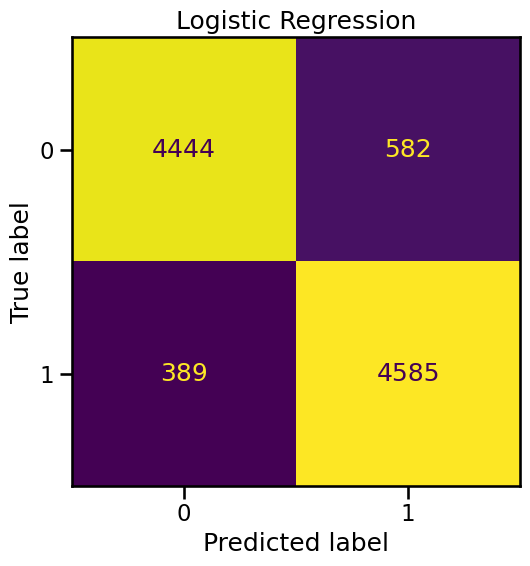

In [23]:
from sklearn.metrics import roc_curve, precision_recall_curve, confusion_matrix,classification_report
from sklearn.metrics import ConfusionMatrixDisplay
sns.set_context('talk')

nrows = 1
ncols = 1



fig, ax = plt.subplots(nrows,ncols,figsize=(6,6))

i=0
name_val =['Logistic Regression']
for ii in range(0,len(names)): 
    
    row = ii % nrows
    col = ii // (ncols + (nrows-ncols))
    x = names[ii]
    model = best_estimators[x]
    y_pred = model.predict(X_test_transformed_tfidf)

    
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm).plot(ax = ax, colorbar = False)
    ax.set_title(name_val[i])
    i+=1
plt.tight_layout()
plt.show()

In [24]:
from sklearn.metrics import classification_report

for x in names:
    val = str(x)
    y_pred = best_estimators[val].fit(X_train_transformed_tfidf, y_train).predict(X_test_transformed_tfidf)
    print(x)
    print(classification_report(y_pred, y_test))


LR
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      4833
           1       0.92      0.89      0.90      5167

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

